Feature shape: (1200, 128, 128, 1)
Label shape: (1200, 15)
PCA reduced shape: (1200, 500)

✅ Training Accuracy: 100.00%
✅ Test Accuracy: 46.25%

Classification Report (on Test Data):
               precision    recall  f1-score   support

     Airplane       0.38      0.50      0.43        16
         Book       0.25      0.19      0.21        16
          Cup       0.36      0.31      0.33        16
     Envelope       0.69      0.69      0.69        16
          Fan       0.21      0.19      0.20        16
         Fork       0.46      0.69      0.55        16
          Hat       0.56      0.62      0.59        16
          Key       0.42      0.50      0.46        16
       Laptop       0.46      0.38      0.41        16
         Leaf       0.20      0.19      0.19        16
         Moon       0.47      0.56      0.51        16
        Pizza       0.42      0.31      0.36        16
      T-shirt       0.56      0.56      0.56        16
Traffic Light       0.54      0.44      0.48  

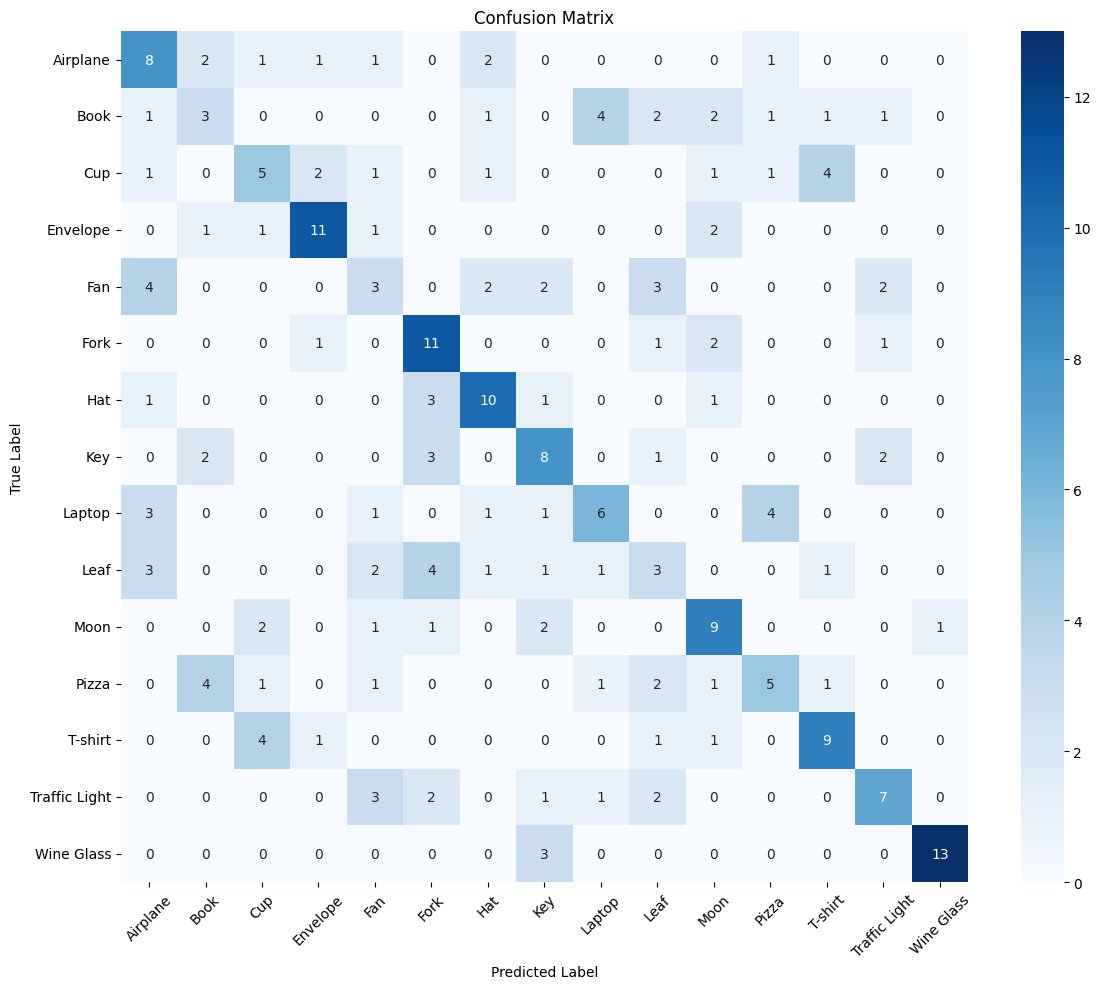

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# --- Step 1: Load the data ---
X = np.load("preprocessed_images.npy")       # Shape: (1200, 128, 128, 1)
y = np.load("preprocessed_labels.npy")       # Shape: (1200, 15)

print("Feature shape:", X.shape)
print("Label shape:", y.shape)

# --- Step 2: Custom label dictionary ---
label_dict = {
    0: "Airplane", 1: "Book", 2: "Cup", 3: "Envelope", 4: "Fan",
    5: "Fork", 6: "Hat", 7: "Key", 8: "Laptop", 9: "Leaf",
    10: "Moon", 11: "Pizza", 12: "T-shirt", 13: "Traffic Light", 14: "Wine Glass"
}

# --- Step 3: Reshape & flatten ---
X = X.reshape(X.shape[0], -1)  # From (1200, 128, 128, 1) to (1200, 16384)

# --- Step 4: Standardize features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Step 5: Apply PCA ---
pca = PCA(n_components=500, random_state=42)
X_pca = pca.fit_transform(X_scaled)
print("PCA reduced shape:", X_pca.shape)

# --- Step 6: Convert one-hot labels to indices ---
if len(y.shape) > 1 and y.shape[1] > 1:
    y = np.argmax(y, axis=1)

# --- Step 7: Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.2, random_state=42, stratify=y
)

# --- Step 8: Train SVM ---
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)

# --- Step 9: Predict ---
y_train_pred = svm.predict(X_train)
y_test_pred = svm.predict(X_test)

# --- Step 10: Accuracy ---
train_acc = accuracy_score(y_train, y_train_pred)
test_acc = accuracy_score(y_test, y_test_pred)

print(f"\n✅ Training Accuracy: {train_acc * 100:.2f}%")
print(f"✅ Test Accuracy: {test_acc * 100:.2f}%")

# --- Step 11: Evaluation Report ---
print("\nClassification Report (on Test Data):")
print(classification_report(y_test, y_test_pred, target_names=list(label_dict.values())))

# --- Step 12: Confusion Matrix ---
conf_matrix = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_dict.values(),
            yticklabels=label_dict.values())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()
